In [1]:
#-----------------------------
# Import Modules
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
#-------------------------------

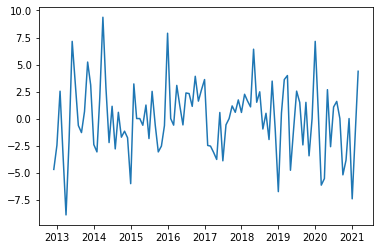

In [21]:
# Data
df = pd.read_csv('https://raw.githubusercontent.com/antonio-hickey/Economics/master/Consumer%20Prices/Data/PCETRIM12M159SFRBDAL.csv', parse_dates=['Date'],index_col=['Date'])
df = df[-100:] # Sample last 250 data points
plt.plot(df)

In [40]:
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries['Value'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

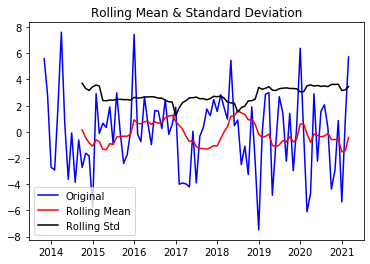

ADF Statistic: -4.887232052289052
p-value: 3.692597330395136e-05
Critical Values:
	1%: -3.518281134660583
	5%: -2.899878185191432
	10%: -2.5872229937594873


In [41]:
# Statistical Units of Measurement 
rolling_mean = df.rolling(window=12).mean() # Rolling Mean
rolling_std = df.rolling(window=12).std()   # Rolling Standard Deviation
df_minus_mean = df - rolling_mean
df_minus_mean.dropna(inplace=True)

get_stationarity(df_minus_mean)

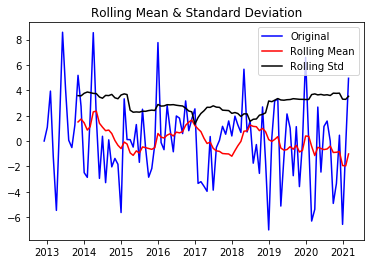

ADF Statistic: -4.162449717129916
p-value: 0.0007622620761897863
Critical Values:
	1%: -3.506944401824286
	5%: -2.894989819214876
	10%: -2.584614550619835


In [42]:
rolling_mean_exp_decay = df.ewm(halflife=12, min_periods=0, adjust=True).mean()
df_log_exp_decay = df - rolling_mean_exp_decay
df_log_exp_decay.dropna(inplace=True)
get_stationarity(df_log_exp_decay)

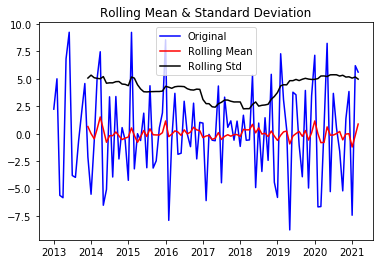

ADF Statistic: -4.003777014118517
p-value: 0.0013908623214075801
Critical Values:
	1%: -3.5078527246648834
	5%: -2.895382030636155
	10%: -2.584823877658872


In [43]:
df_log_shift = df - df.shift()
df_log_shift.dropna(inplace=True)
get_stationarity(df_log_shift)

/home/sratus/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sratus/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


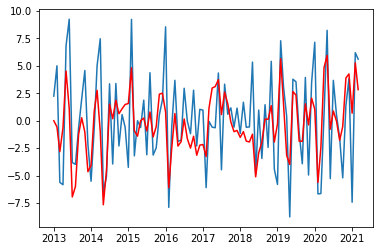

In [44]:
decomposition = seasonal_decompose(df) 
model = ARIMA(df, order=(2,1,2))
results = model.fit(disp=-1)
plt.plot(df_log_shift)
plt.plot(results.fittedvalues, color='red')

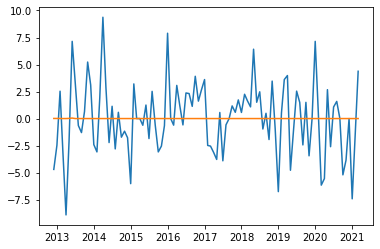

In [45]:
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(df['Value'].iloc[0], index=df.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df)
plt.plot(predictions_ARIMA)

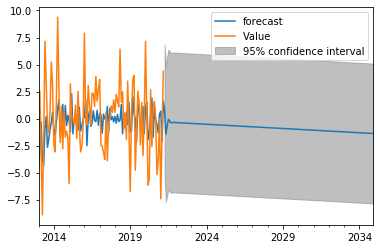

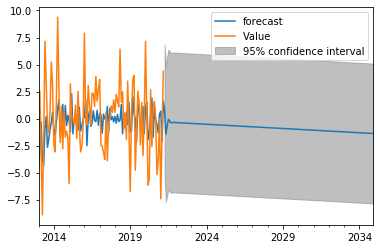

In [46]:
results.plot_predict(1,264)

In [34]:
result = adfuller(df['Value'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -3.9955885416578303
p-value: 0.001433787919208615
Critical Values:
	1%: -3.506944401824286
	5%: -2.894989819214876
	10%: -2.584614550619835


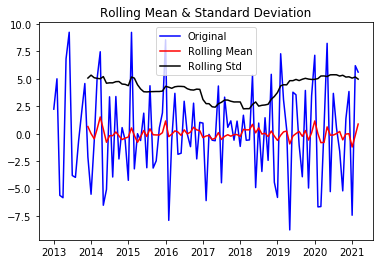

ADF Statistic: -4.003777014118517
p-value: 0.0013908623214075801
Critical Values:
	1%: -3.5078527246648834
	5%: -2.895382030636155
	10%: -2.584823877658872


In [39]:
df_shift = df - df.shift()
df_shift.dropna(inplace=True)
get_stationarity(df_shift)

/home/sratus/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/sratus/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


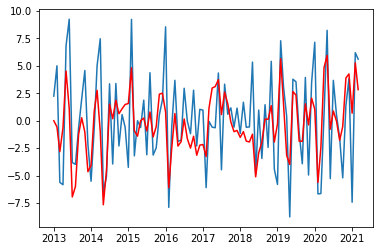

In [36]:
decomposition = seasonal_decompose(df) 
model = ARIMA(df, order=(2,1,2))
results = model.fit(disp=-1)
plt.plot(df_shift)
plt.plot(results.fittedvalues, color='red')

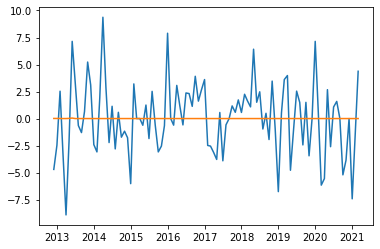

In [29]:
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(df['Value'].iloc[0], index=df.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df)
plt.plot(predictions_ARIMA)

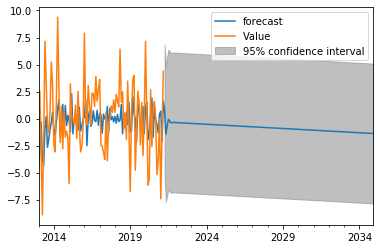

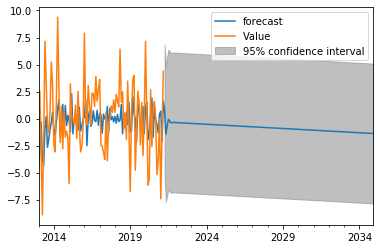

In [30]:
results.plot_predict(1,264)